In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo.processes import WhiteSignal

from nengo.utils.matplotlib import rasterplot

model = nengo.Network()
with model:
    inp = nengo.Node(WhiteSignal(50, high=5), size_out=1)
    pre = nengo.Ensemble(50, dimensions=1)
    nengo.Connection(inp, pre)
    post = nengo.Ensemble(50, dimensions=1)
    conn = nengo.Connection(pre, post, function=lambda x: np.random.random(1))
    inp_p = nengo.Probe(inp)
    pre_p = nengo.Probe(pre, synapse=0.01)
    post_p = nengo.Probe(post, synapse=0.01)
    pre_spike_p = nengo.Probe(pre.neurons)
    post_spike_p = nengo.Probe(post.neurons)

In [19]:
with nengo.Simulator(model) as sim:
    sim.run(10.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

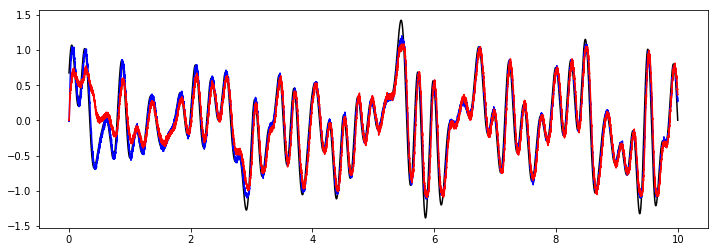

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(sim.trange(), sim.data[inp_p].T[0], c='k', label='Input')
plt.plot(sim.trange(), sim.data[pre_p].T[0], c='b', label='Pre')
plt.plot(sim.trange(), sim.data[post_p].T[0], c='r', label='Post')


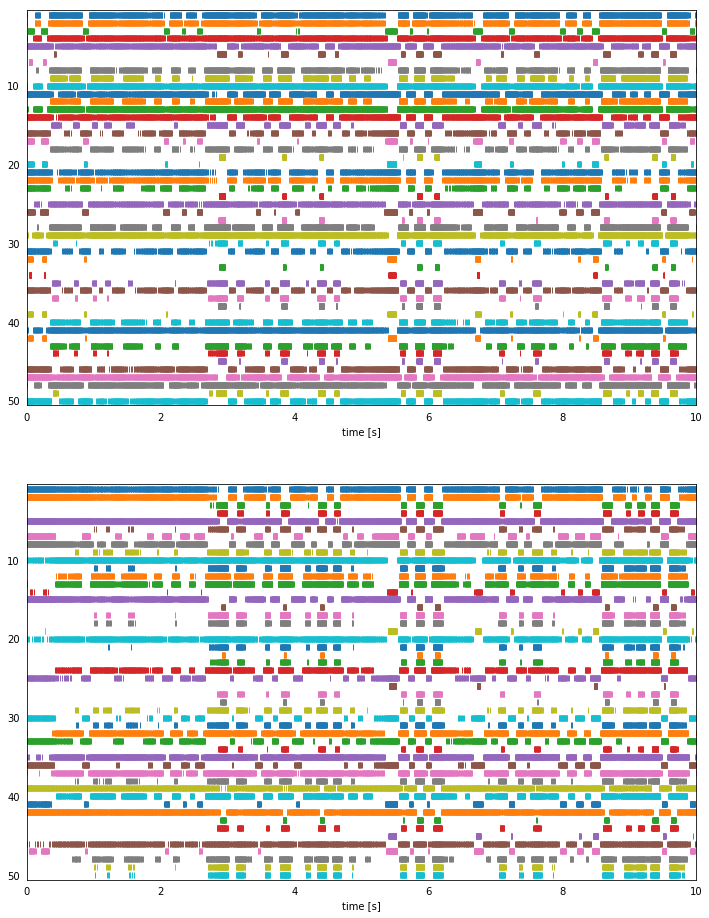

In [21]:
plt.figure(figsize=(12, 16))
plt.subplot(2, 1, 1)
rasterplot(sim.trange(), sim.data[pre_spike_p])
plt.xlabel('time [s]');
plt.subplot(2, 1, 2)
rasterplot(sim.trange(), sim.data[post_spike_p])
plt.xlabel('time [s]');

In [18]:
with model:
    error = nengo.Ensemble(50, dimensions=1)
    error_p = nengo.Probe(error, synapse=0.03)
    nengo.Connection(post, error)
    nengo.Connection(pre, error, transform=-1)
    conn.learning_rule_type = nengo.PES()
    nengo.Connection(error, conn.learning_rule)